Connor McLaughlin
February 20th, 2025

In [27]:
import numpy as np
import matplotlib.pyplot as plt

A. (5 pts) Write a program that executes one ‘walk’ starting from 𝑥 = 0 and takes N steps. Create
an instance of the numpy random number generator rng = np.random.default_rng()
and use the method rng.integers() with the appropriate argument. Look at the class notes
or the handout “More Python Features” for guidance in using the numpy random module.


In [28]:
def walk1(initialPosition, nSteps):
    x = initialPosition
    #creating a random number generator
    rng = np.random.default_rng()
    # creating a list to store position values for plotting, also choosing each step's direction
    steps = rng.choice([-1, 1], size=nSteps)
    #cumsum sums the steps to get the position
    position = np.insert(np.cumsum(steps), 0, initialPosition)
    return position

#running a 1d walk
print(walk1(0, 10))

[ 0 -1 -2 -3 -4 -5 -4 -3 -4 -3 -2]


B. (5 pts) Make a plot of the x position of the particle as a function of step number for N = 100 and
1000. Use the matplotlib library. Label the horizontal and vertical axes appropriately and give
the plot a title.

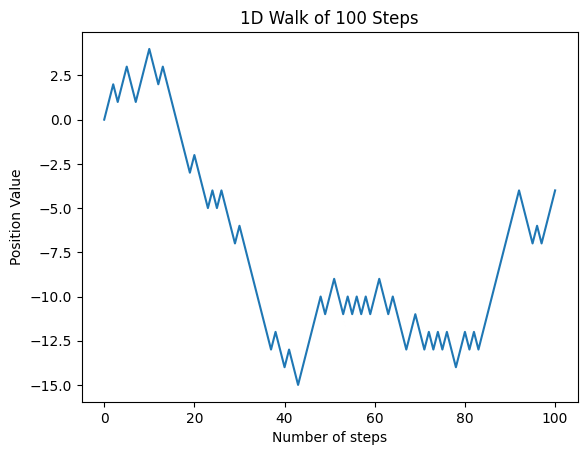

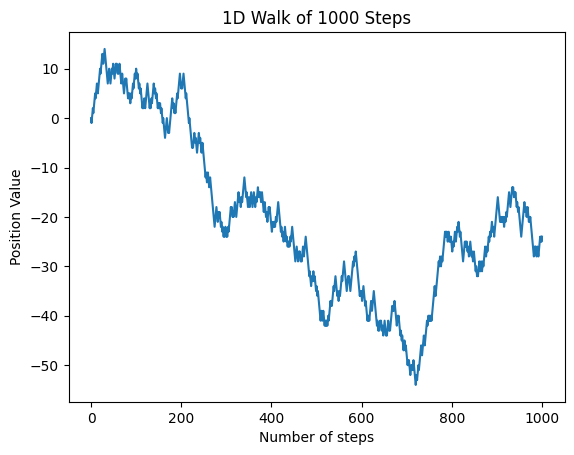

In [29]:
plt.figure()
#I plot the function that outputs a walk simulation as a list
plt.plot(walk1(0, 100))
plt.title("1D Walk of 100 Steps")
plt.xlabel("Number of steps")
plt.ylabel("Position Value")
plt.show()

plt.figure()
#Plotting 1000 1d walk trials
plt.plot(walk1(0, 1000))
plt.title("1D Walk of 1000 Steps")
plt.xlabel("Number of steps")
plt.ylabel("Position Value")
plt.show()

C. (5 pts) Plot 10 separate N-step random walks on the same graph (i.e. number of trials Ntrials =
10) for N = 100 and 1000.

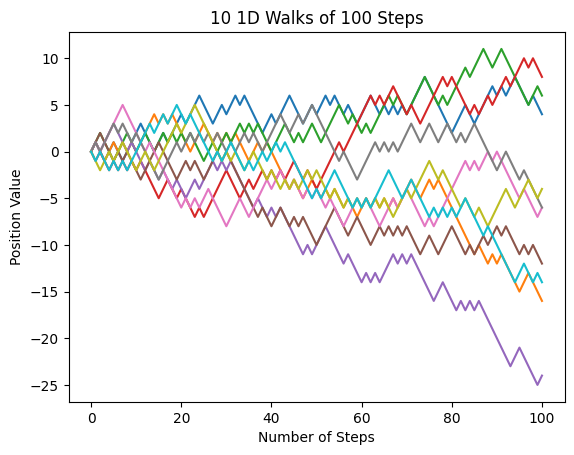

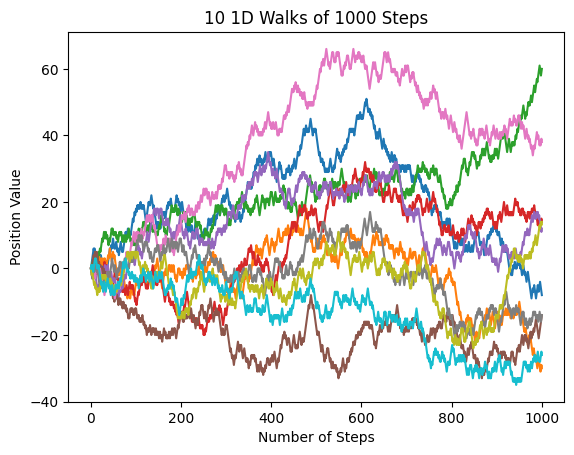

In [30]:
#define a function to generate walks
def genWalkPlot(intPos, steps, numGen):
    #creates the figure
    plt.figure()
    #plots all walks onto one graph (the number of walks is specified in the parameters)
    for i in range(numGen):
        plt.plot(walk1(intPos, steps))
    #These are all labels
    plt.title(f"{numGen} 1D Walks of {steps} Steps")
    plt.xlabel("Number of Steps")
    plt.ylabel("Position Value")
    plt.show()

#Calling the plot generation
genWalkPlot(0, 100, 10)
genWalkPlot(0, 1000, 10)

D. (5 pts) Now stop plotting the x position of the walker vs step number. Instead, run Ntrials = 1000
random walks of N steps, and record the final x position of each separate walk. Do this for N =
100, $10^4$, $9 \times 10^4$. For each N value, generate a histogram of the final x positions of the walker.
Choose the number of bins judiciously to make your graph look good. What kind of distribution
do you see?

E. (5 pts) For these three values of N = 100, $10^4$, $9 \times 10^4$, run Ntrials = 1000 random walks, and
calculate the mean and root mean square (rms) displacement from the origin for each N.

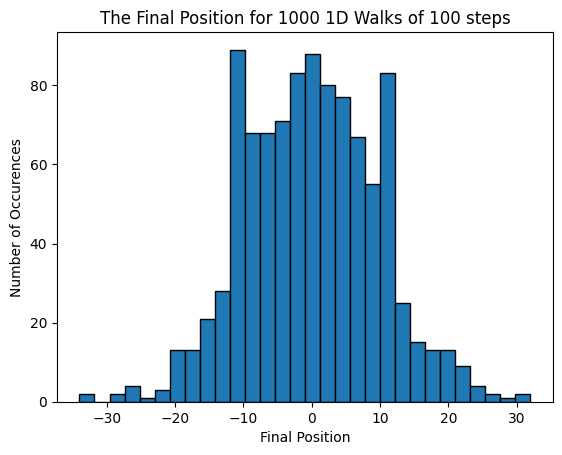

The mean is: -0.168
The root mean square displacement from the origin is: 9.711848433743187


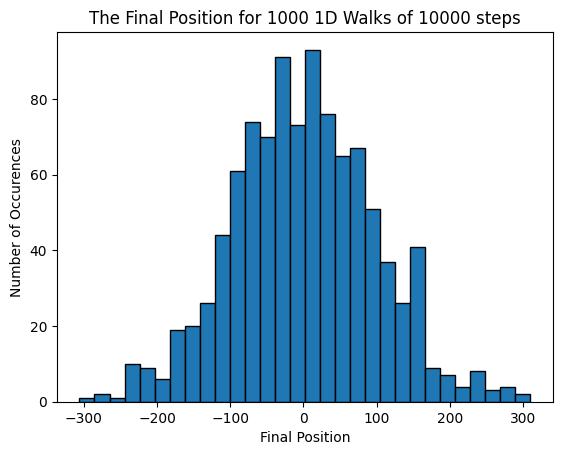

The mean is: 0.706
The root mean square displacement from the origin is: 97.60670058966238


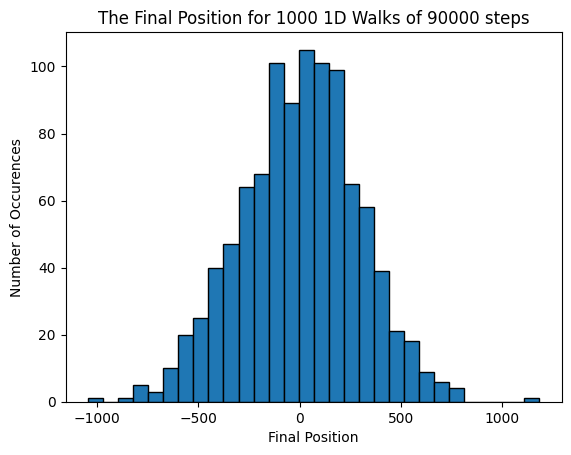

The mean is: 1.252
The root mean square displacement from the origin is: 291.00481095679504


In [31]:
#Generate multiple random walks and plots all of them
def histoMaker(numTrials, intPos, nSteps, walkFunc):
    finalPositions = []
    #storing final positions in the finalPositions list and doing this for {numTrials} trials
    for i in range(numTrials):
        finalPositions.append(walkFunc(intPos, nSteps)[-1])
    #Plotting and labelling
    plt.hist(finalPositions, edgecolor='black', bins=30)
    plt.title(f"The Final Position for {numTrials} 1D Walks of {nSteps} steps")
    plt.xlabel("Final Position")
    plt.ylabel("Number of Occurences")
    plt.show()
    #numpy calculates the mean
    print(f"The mean is: {np.mean(finalPositions)}")
    #calculating the root mean square is followed exactly how spelt out in the name
    print(f"The root mean square displacement from the origin is: {np.sqrt(np.mean(np.square(finalPositions)))}")


histoMaker(1000, 0, 100, walk1)
histoMaker(1000, 0, 10000, walk1)
histoMaker(1000, 0, 10000*9, walk1)

You see the start of a gaussian distribution with the final points of the walk. It tapers off as you get further from the central value. 

F. (5 pts) Do you see a pattern in the mean and rms displacement values? Is this consistent with the
shape of the distribution of end points? Try Ntrials = 5000 for N = 10000. Do the mean and rms
values for a given N change as Ntrials changes?

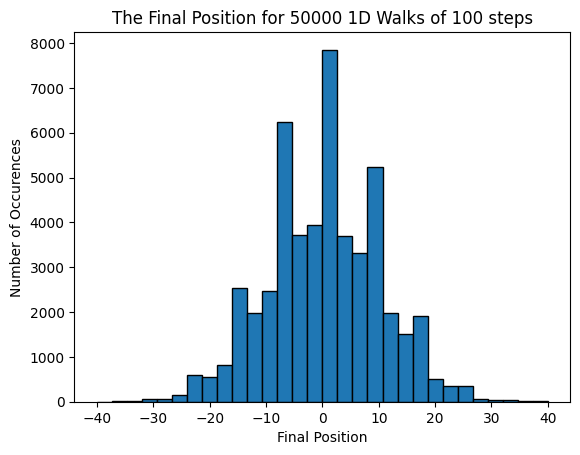

The mean is: -0.03656
The root mean square displacement from the origin is: 9.977029618077717


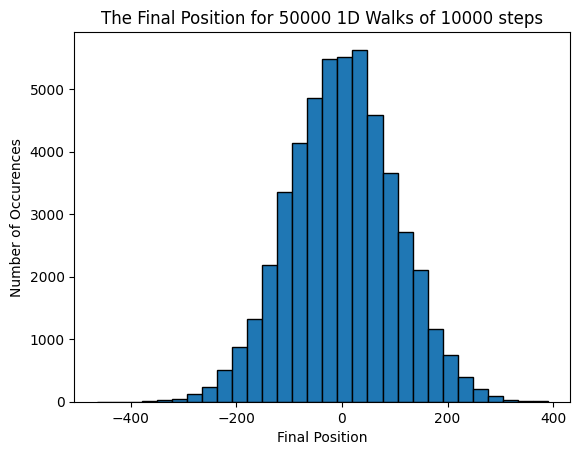

The mean is: 0.82088
The root mean square displacement from the origin is: 100.0325850910592


KeyboardInterrupt: 

In [32]:
#Plotting 50000 to see if the means or rms is different
histoMaker(50000, 0, 100, walk1)
histoMaker(50000, 0, 10000, walk1)
histoMaker(50000, 0, 10000*9, walk1)

The root mean square displacement is roughly the squareroot of the number of steps, but the mean seems to propagate near to 0. The mean makes sense because a guassian distribution has a mean of 0. The root mean square displacement for a gaussian is one standard deviation, this appears to rougly be the case.

Part II: Simulate a fixed length random walk in two dimensions (2D).

A. (10 pts) Write a program that executes one ‘walk’ starting from 𝑥 = 0 and takes N steps. Make a
plot of the trajectory taken by the particle (plot y against x) for N = 100 and 10,000. For each N
value, do this for 10 separate random walks on the same plot, in the following format:

a. Label the x and y axes appropriately, and give the plot a title

b. Indicate the end position with a black asterisk.

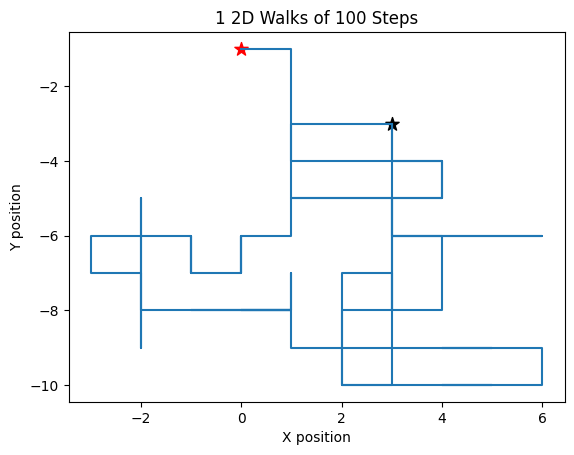

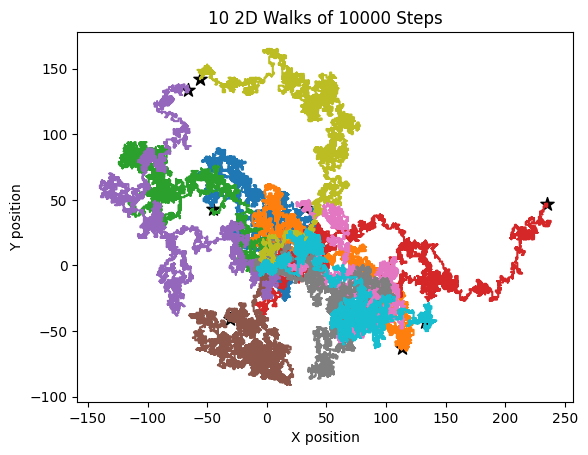

In [ ]:
def walk2(numSteps):
    rng = np.random.default_rng()
    #Same as walk 1, this creates a list of size numSteps for each direction, 0 corresponds to a step in the x direction and 1 is a step in the y
    directions = rng.choice([0,1], size = numSteps)
    #creating the steps as 0s to create size faster
    stepX = np.zeros(numSteps, dtype = int)
    stepY = np.zeros(numSteps, dtype = int)
    #changing the 0's to a steps since 0's correspond to an x step, and changing 1's to a y step
    stepX[directions==0] = rng.choice([-1, 1], size= np.sum(directions==0))
    stepY[directions==1] = rng.choice([-1, 1], size= np.sum(directions==1))
    #summing all of the steps and changing the position list to the position after each step
    xPos = np.cumsum(stepX)
    yPos = np.cumsum(stepY)
    return xPos, yPos



#this assigns x to xPos and y to yPos so I can plot the points

def a2dWalk(numTrials, nSteps):
    for i in range(numTrials):
        #storing the x and y positions as x, y for a walk
        x, y = walk2(nSteps)
        plt.plot(x, y)
        # Add black star at the last point
        plt.scatter(x[-1], y[-1], color='black', marker='*', s=100)
        plt.scatter(x[0], y[0], color='r', marker='*', s=100)
    plt.xlabel("X position")
    plt.ylabel("Y position")
    plt.title(f"{numTrials} 2D Walks of {nSteps} Steps")
    plt.show()


a2dWalk(1, 100)
a2dWalk(10, 10000)


B. (5 pts) As you did for the 1D walk, stop visualizing each walk, and instead run Ntrials = 1000
random walks of N steps for N = 100 &10,000, and record the final position of each separate
walk. Show these end positions as points on a (x,y) graph. How are these points distributed about
the origin?

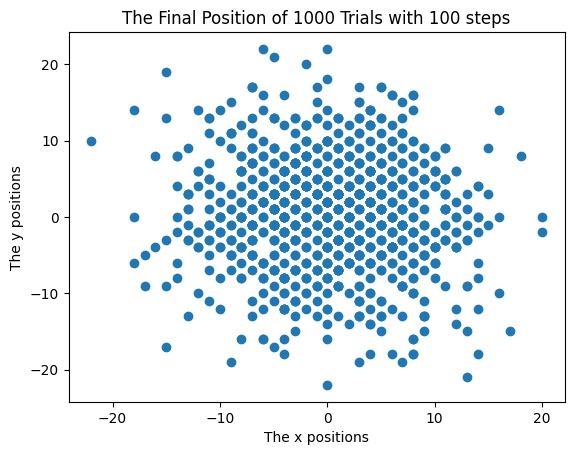

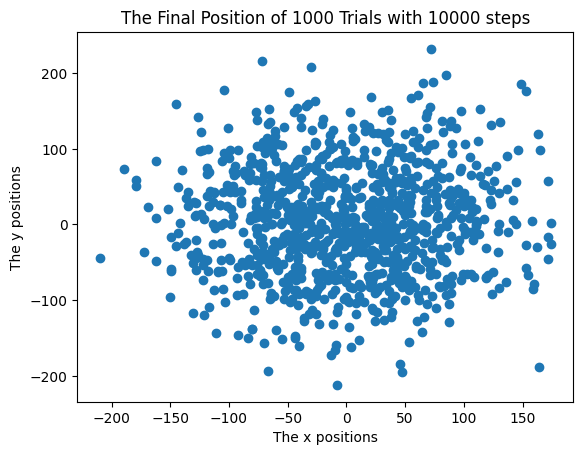

In [ ]:
#Defining a function that will create a graph of the final points of nTrials that each have nSteps
def finalPosPlot(nTrials, nSteps):
    finalLocX = []
    finalLocY = []
    #Loops through all n trials while storing the final position
    for i in range(nTrials):
        #I make a copy so that I can access the y and the x seperately while having the same position
        tempList = np.copy(walk2(nSteps))
        #Adding the final x position
        finalLocX.append(int(tempList[0][-1]))
        #Adding the final y position
        finalLocY.append(int(tempList[1][-1]))
    #Creating a scatter plot using all the final positions
    plt.scatter(finalLocX, finalLocY)
    plt.title(f"The Final Position of {nTrials} Trials with {nSteps} steps")
    plt.xlabel("The x positions")
    plt.ylabel("The y positions")
    plt.show()

#100 trials
finalPosPlot(1000, 100)

#100 trials
finalPosPlot(1000, 10000)

By looking at these trials it appears that most of the points are concentrated toward the center, as you get further from the center the probability of landing on a point lessens. 

C. (5 pts) Generate a histogram of the final distance $r=\sqrt{x^2 + y^2}$ of the walker from the origin.
Choose the number of bins to make your graph look good. What kind of distribution do you see?
Compare this to the separate distributions for x positions and y positions of the end points.

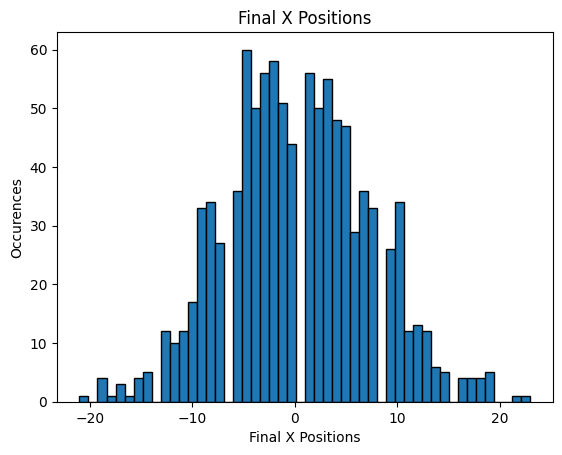

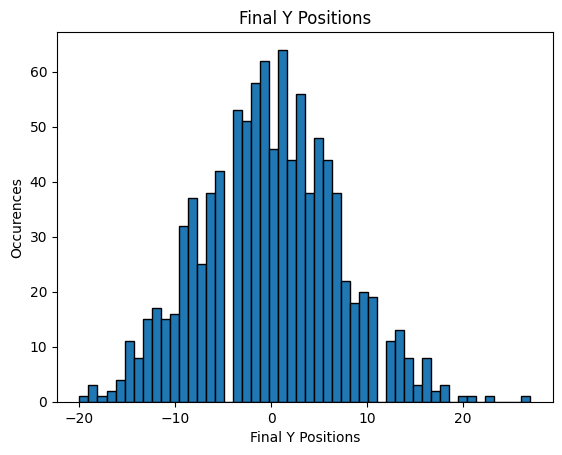

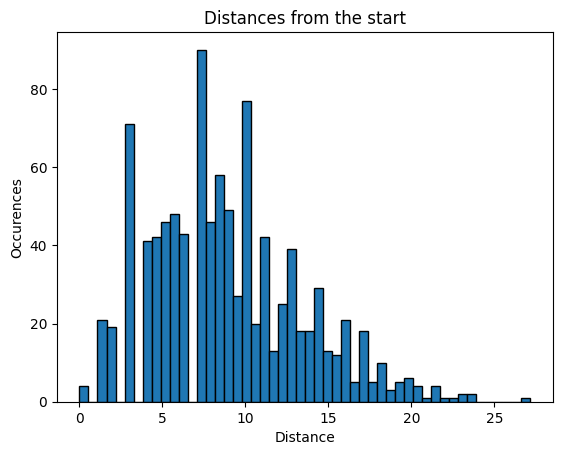

The mean is: 8.93485793173977
The root mean square displacement from the origin is: 10.019580829555695
The ratio between the mean and the root mean square displacement is: 0.8917396928805429 


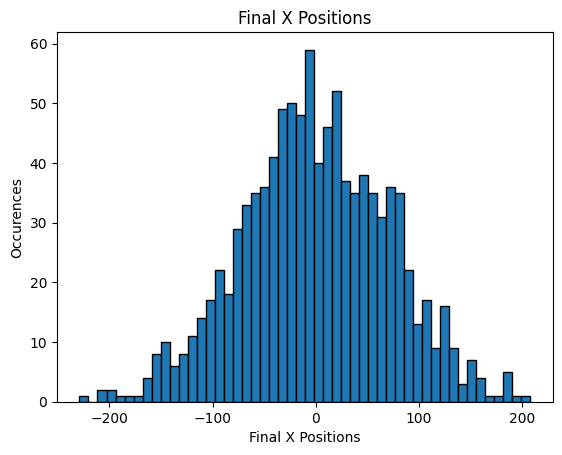

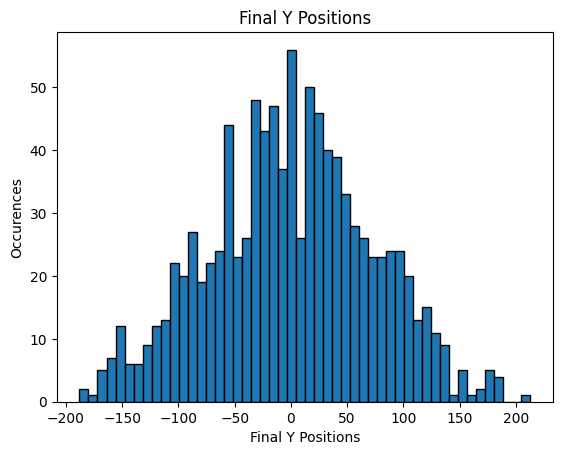

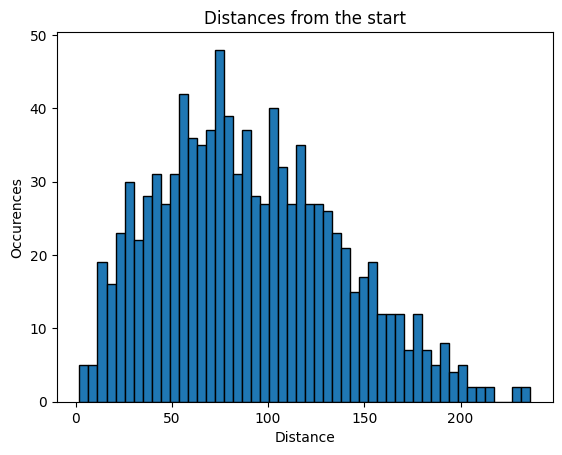

The mean is: 90.47575605631945
The root mean square displacement from the origin is: 101.83511182298568
The ratio between the mean and the root mean square displacement is: 0.8884534463279073 


In [ ]:
def histoDistance2d(numTrials, nSteps):
    #This is going to be used to store all the final distances of each trial
    xPos = []
    yPos = []
    distance = []
    #This loop cycles through all of the trials
    for i in range(numTrials):
        #This copies the walk so that I can access to positions in the same walk
        tempWalk = np.copy(walk2(nSteps))
        #Here i add the final distance to the distance list
        distance.append(np.sqrt((tempWalk[0][-1])*(tempWalk[0][-1]) + (tempWalk[1][-1])*tempWalk[1][-1]))
        xPos.append(tempWalk[0][-1])
        yPos.append(tempWalk[1][-1])
    mean = np.mean(distance)
    rms = np.sqrt(np.mean(np.square(distance)))
    #Final X positions 
    plt.figure()
    plt.hist(xPos, edgecolor = 'black', bins = 50)
    plt.title("Final X Positions")
    plt.xlabel("Final X Positions")
    plt.ylabel("Occurences")
    plt.show()

    #Final y positions
    plt.figure()
    plt.hist(yPos, edgecolor = 'black', bins = 50)
    plt.title("Final Y Positions")
    plt.xlabel("Final Y Positions")
    plt.ylabel("Occurences")
    plt.show()

    #this is plotting distances with 50 bins
    plt.hist(distance, edgecolor = 'black', bins = 50)
    plt.title("Distances from the start")
    plt.xlabel("Distance")
    plt.ylabel("Occurences")
    plt.show()
    print(f"The mean is: {mean}")
    print(f"The root mean square displacement from the origin is: {rms}")
    print(f"The ratio between the mean and the root mean square displacement is: {mean/rms} ")
    
histoDistance2d(1000, 100)
histoDistance2d(1000, 10000)
#do x position and y position graphs

    



You see a Rayleigh's distribution, most distances are in one area and quickly fall off as you get closer to 0, but fall off more gradually as you go to the right. 

D. (5 pts) Calculate the mean and root mean square (rms) displacement from the origin for N = 100
and $10^4$. Do you see a pattern in the mean and rms displacement values? How does this compare
with your 1D results? Discuss in a markdown cell.

I printed the mean and the rms beneath the graphs. The root mean square appears to be roughly the square root of the number of trials, and the mean seems to be roughly 88%-89% of the rms displacement value. The root mean square seems to be about the sum, but the mean is different as the one-d walk appears to stay around 0 while the 2d walk appears to be 90% of the rms.

E. (for 10 extra credit points) Repeat B – D for a a two-dimensional random walk that is no longer
on a square grid. Instead, the particle starts at the origin and can move one step of length r
drawn from a normal distribution: r = rng.normal() and angle relative to the x-axis
distributed randomly between 0 and 2pi: $$\theta = 2\times \pi \times rng.random()$$. How do these
compare with your results for the walk on a square lattice? Discuss in a markdown cell.

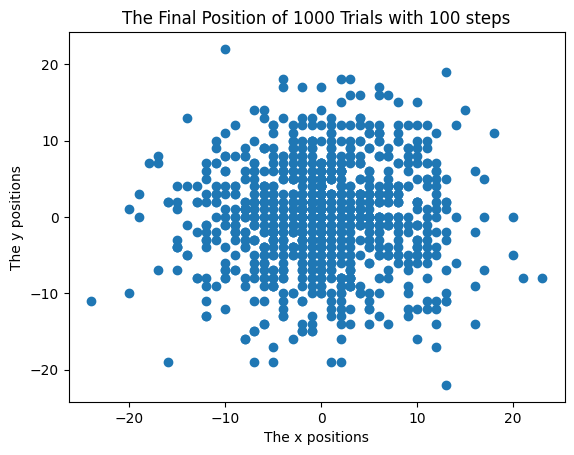

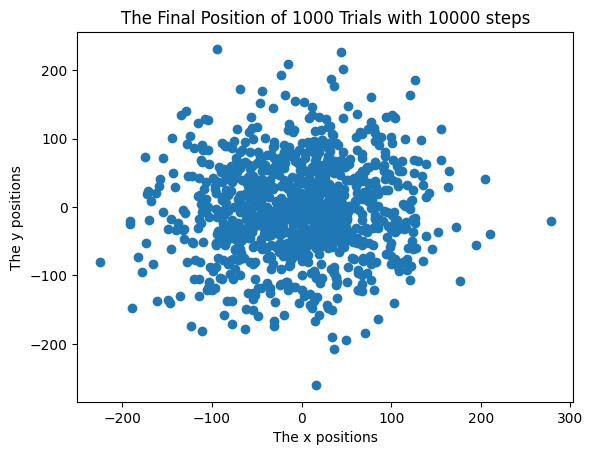

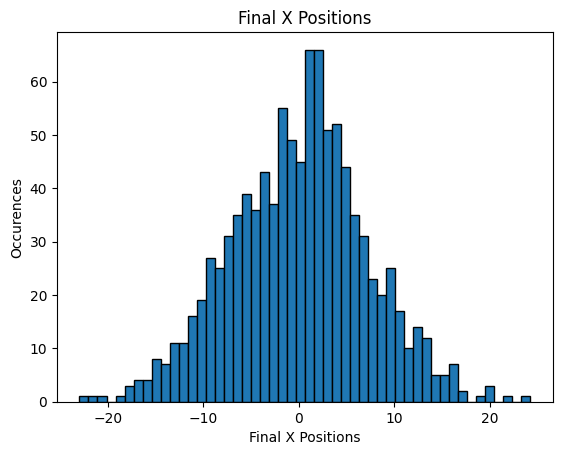

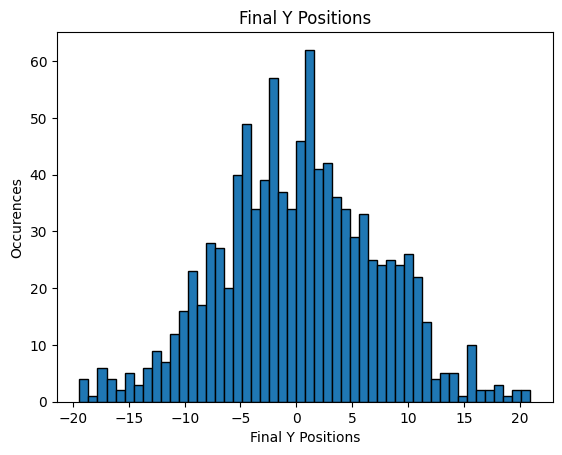

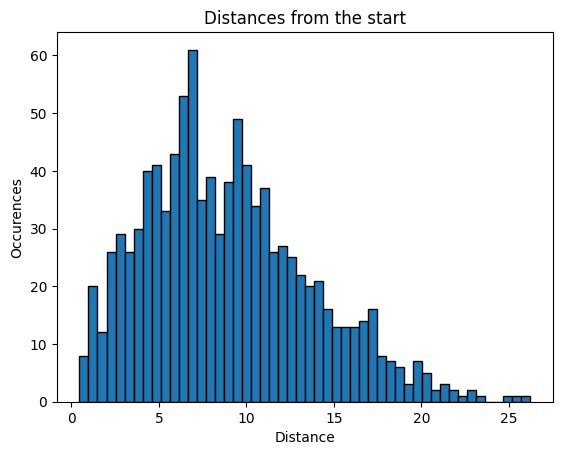

The mean is: 8.884291378490156
The root mean square displacement from the origin is: 10.061484087561363
The ratio between the mean and the root mean square displacement is: 0.8830000923495445 


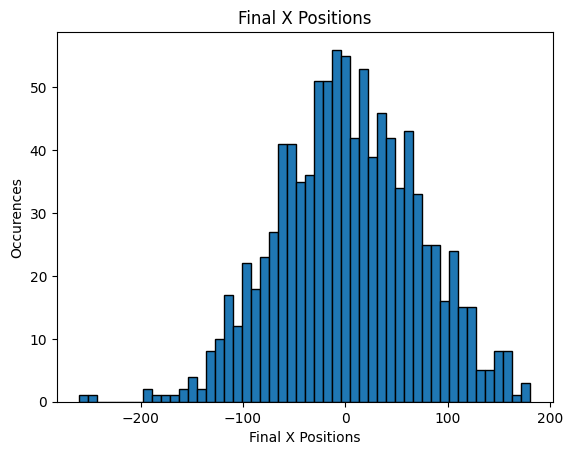

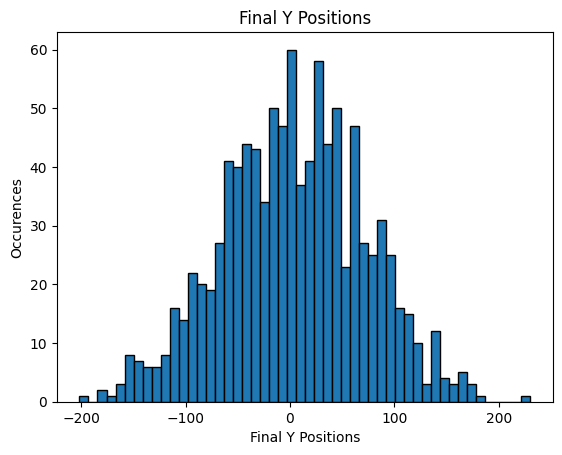

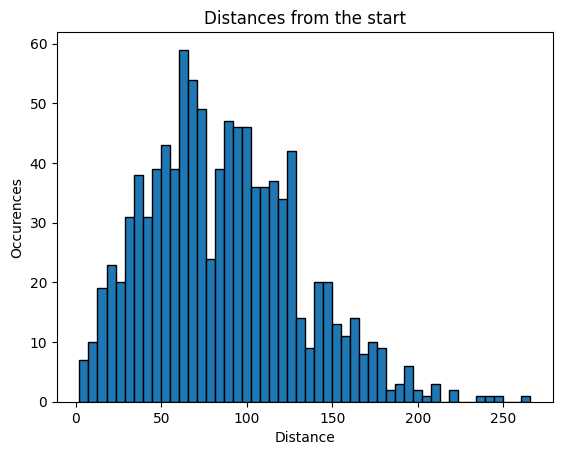

The mean is: 86.23352189232413
The root mean square displacement from the origin is: 96.87051612752641
The ratio between the mean and the root mean square displacement is: 0.8901936867849545 


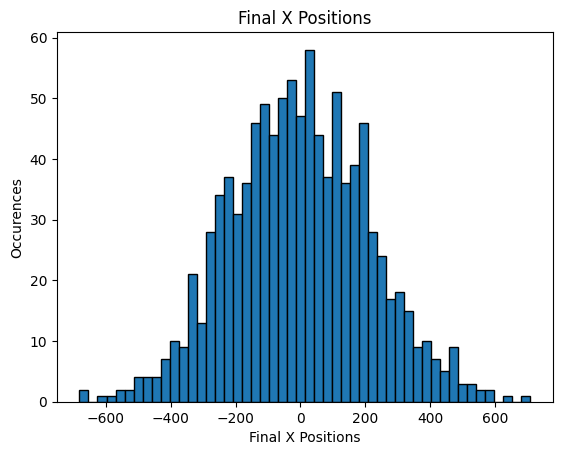

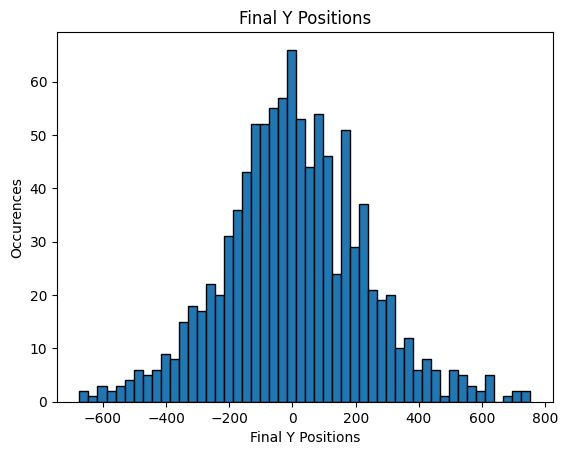

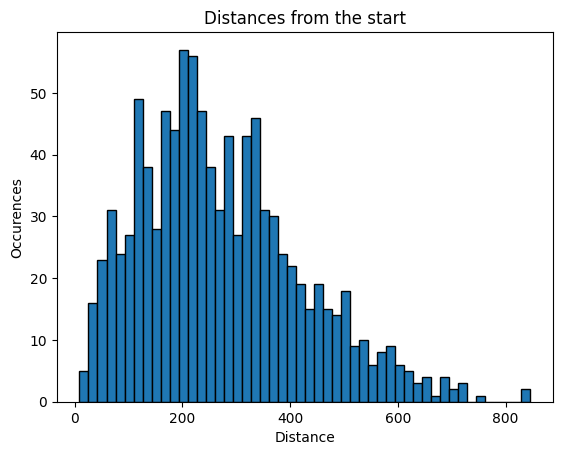

The mean is: 272.09575587007083
The root mean square displacement from the origin is: 310.2789010407156
The ratio between the mean and the root mean square displacement is: 0.876939279330391 


In [ ]:
def walkCircle(numSteps, bool=False):
    rng = np.random.default_rng()
    #randomly generates a length
    r = rng.normal(size = numSteps)
    #randomly generates an angle from 0 - 2pi (I believe non inclusive since the probability of generating a 1 is 0 and so is the probability of generating a 0)
    theta = 2*np.pi*rng.random(size = numSteps)
    xSteps = r*np.cos(theta)
    ySteps = r*np.sin(theta)
    #This sums all of the steps and adds each sum to the x position, this is done so that I have a track of each position after each step.
    xPos = np.insert(np.cumsum(xSteps), 0, 0)
    yPos = np.insert(np.cumsum(ySteps), 0, 0)
    #this is so that i don't have to define a separate function to return the distance from the point in part C
    if not(bool):
        return xPos, yPos
    if bool:
        return r
    

'''Part B'''
#Defining a function that will create a graph of the final points of nTrials that each have nSteps
def finalPosPlot(nTrials, nSteps):
    finalLocX = []
    finalLocY = []
    #Loops through all n trials while storing the final position
    for i in range(nTrials):
        #I make a copy so that I can access the y and the x seperately while having the same position
        tempList = np.copy(walkCircle(nSteps))
        #Adding the final x position
        finalLocX.append(int(tempList[0][-1]))
        #Adding the final y position
        finalLocY.append(int(tempList[1][-1]))
    #Creating a scatter plot using all the final positions
    plt.scatter(finalLocX, finalLocY)
    plt.title(f"The Final Position of {nTrials} Trials with {nSteps} steps")
    plt.xlabel("The x positions")
    plt.ylabel("The y positions")
    plt.show()

finalPosPlot(1000, 100)
finalPosPlot(1000, 10000)

'''Part C'''
def histoDistance2dCirc(numTrials, nSteps):
    #This is going to be used to store all the final distances of each trial
    distance = []
    xPos = []
    yPos = []
    #This loop cycles through all of the trials
    for i in range(numTrials):
        #This copies the walk so that I can access to positions in the same walk
        tempWalk = np.copy(walkCircle(nSteps))
        #Here i add the final distance to the distance list
        distance.append(np.sqrt((tempWalk[0][-1])*(tempWalk[0][-1]) + (tempWalk[1][-1])*tempWalk[1][-1]))
        xPos.append(tempWalk[0][-1])
        yPos.append(tempWalk[1][-1])
    mean = np.mean(distance)
    rms = np.sqrt(np.mean(np.square(distance)))
    #Final X positions 
    plt.figure()
    plt.hist(xPos, edgecolor = 'black', bins = 50)
    plt.title("Final X Positions")
    plt.xlabel("Final X Positions")
    plt.ylabel("Occurences")
    plt.show()

    #Final y positions
    plt.figure()
    plt.hist(yPos, edgecolor = 'black', bins = 50)
    plt.title("Final Y Positions")
    plt.xlabel("Final Y Positions")
    plt.ylabel("Occurences")
    plt.show()

    #this is plotting distances with 50 bins
    plt.hist(distance, edgecolor = 'black', bins = 50)
    plt.title("Distances from the start")
    plt.xlabel("Distance")
    plt.ylabel("Occurences")
    plt.show()
    print(f"The mean is: {mean}")
    print(f"The root mean square displacement from the origin is: {rms}")
    print(f"The ratio between the mean and the root mean square displacement is: {mean/rms} ")

histoDistance2dCirc(1000, 100)
histoDistance2dCirc(1000, 10000)
histoDistance2dCirc(1000, 100000)
    

E (B) response: These points are wide spread but the density of occurences still decreases as you get further from the origin. This is similar to the 2d walk that was done earlier. 

E (C & D) response: We see the same Rayleigh distribution that we say in the original part C. We also notice that the mean is consistently between 87% - 89% of the rms. The rms is still roughly the square root of the number of steps taken.

Part III: Simulate a first passage process: a bounded random walk in 2D with an absorbing point.

In [33]:
def walk2Bounded(pos = False):
    step=0
    rng = np.random.default_rng()
    edge = [0, 1, 1, 2] #here 0 and 2 are directions along the edge while 1 is perpendicular
    corner = [0, 1] #here equal probability so labelling doesn't matter
    free = [0, 1, 2, 3] # here equal probability but used when not an edge and not a corner
    x, y = -50, 0 #The present position
    xPos = [-50] #The x positions to be used as a list of all positions
    yPos = [0] # The y positions to be used as a list of all y positions
    xMin, xMax = -50, 50 #defining boundaries
    yMin, yMax = -50, 50
    while x!=50 or y!=0:
        #checking right border
        if x==xMax:
            #checking the two corners
            if y == yMax:
                move = rng.choice([(-1, 0), (0, -1)]) # randomly chooses to move to the left or down
            elif y == yMin:
                move = rng.choice([(-1, 0), (0, 1)]) # randomly chooses to move to the left or up
            #if not in the corners then just on the edge
            else:
                move = rng.choice([(-1, 0), (0, 1), (0, -1)], p = [0.5, 0.25, 0.25]) #chooses to move left with 50% probability, then up or down at 25%

        #checking left border
        elif x==xMin:
            #checking the two corners
            if y == yMax:
                move = rng.choice([(1, 0), (0, -1)]) # randomly chooses to move to the right or down, no p = means that there is equal probability
            elif y == yMin:
                move = rng.choice([(1, 0), (0, 1)]) #randomly chooses to move to the right or up, no p = means that there is equal probability
            else:
                move = rng.choice([(1, 0), (0, 1), (0, -1)], p = [0.5, 0.25, 0.25]) #chooses to move right with 50% probability, then up or down at 25%
        
        #This is the top border
        elif y == yMax:
            move = rng.choice([(0, -1), (1, 0), (-1, 0)], p = [0.5, 0.25, 0.25]) #chooses to move down with 50% probability, then left or right at 25%
        #this is the bottom border
        elif y== yMin:
            move = rng.choice([(0, 1), (1, 0), (-1, 0)], p = [0.5, 0.25, 0.25]) #chooses to move up with 50% probability, then left or right at 25%
        else:
            move = rng.choice([(0,1), (1, 0), (-1, 0), (0,-1)])
        #Updating position
        x, y = x+move[0], y+move[1]
        if pos:
            xPos.append(x)
            yPos.append(y)
        #updating steps taken
        step+=1
        #this is in case i need position
    if pos:
        return step, xPos, yPos
    else: return step

#prints the number of steps needed for 1 run
stepsFor1Run = walk2Bounded()
print(stepsFor1Run)
    


37780


B. (5 pts) Make a plot of the trajectory taken by the particle (positions in x,y).

a. Label the x and y axes appropriately, and give the plot a title

b. Indicate the starting position with a black asterisk and the end position with a red asterisk.

83606


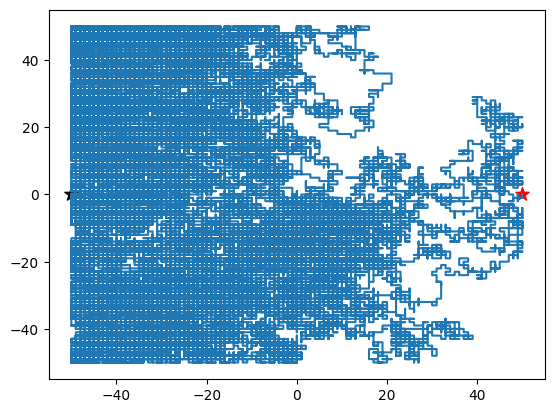

In [41]:
def boundedTraj(numTrials):
    count = 0
    for i in range(numTrials):
        step, X, Y = walk2Bounded(True)
        count += step
        plt.plot(X, Y)
    # Add red star at the last point
    plt.scatter(X[-1], Y[-1], color='red', marker='*', s=100)

    # Add black star at the first point
    plt.scatter(X[0], Y[0], color='black', marker='*', s=100)
    print(count)

boundedTraj(1)

C. (5 pts) Expand your code so that it measures the time-to-absorption for Ntrials= 1000
independent walks. Each starts at (-50,0) and is absorbed when it hits (+50,0). For this part, you
will want to comment out or remove the part that plots the trajectory. (Start with N = 10 trials to
test your code.) Store the times in a list or an array.

In [ ]:
def walk2Bounded(pos = False):
    step=0
    rng = np.random.default_rng()
    x, y = -50, 0 #The present position
    xPos = [-50] #The x positions to be used as a list of all positions
    yPos = [0] # The y positions to be used as a list of all y positions
    xMin, xMax = -50, 50 #defining boundaries
    yMin, yMax = -50, 50
    while x!=50 or y!=0:
        #checking right border
        if x==xMax:
            #checking the two corners
            if y == yMax:
                move = rng.choice([(-1, 0), (0, -1)]) # randomly chooses to move to the left or down
            elif y == yMin:
                move = rng.choice([(-1, 0), (0, 1)]) # randomly chooses to move to the left or up
            #if not in the corners then just on the edge
            else:
                move = rng.choice([(-1, 0), (0, 1), (0, -1)], p = [0.5, 0.25, 0.25]) #chooses to move left with 50% probability, then up or down at 25%

        #checking left border
        elif x==xMin:
            #checking the two corners
            if y == yMax:
                move = rng.choice([(1, 0), (0, -1)]) # randomly chooses to move to the right or down, no p = means that there is equal probability
            elif y == yMin:
                move = rng.choice([(1, 0), (0, 1)]) #randomly chooses to move to the right or up, no p = means that there is equal probability
            else:
                move = rng.choice([(1, 0), (0, 1), (0, -1)], p = [0.5, 0.25, 0.25]) #chooses to move right with 50% probability, then up or down at 25%
        
        #This is the top border
        elif y == yMax:
            move = rng.choice([(0, -1), (1, 0), (-1, 0)], p = [0.5, 0.25, 0.25]) #chooses to move down with 50% probability, then left or right at 25%
        #this is the bottom border
        elif y== yMin:
            move = rng.choice([(0, 1), (1, 0), (-1, 0)], p = [0.5, 0.25, 0.25]) #chooses to move up with 50% probability, then left or right at 25%
        else:
            move = rng.choice([(0,1), (1, 0), (-1, 0), (0,-1)])
        #Updating position
        x, y = x+move[0], y+move[1]
        if pos:
            xPos.append(x)
            yPos.append(y)
        #updating steps taken
        step+=1
    if pos:
        return step, xPos, yPos
    else: return step

def boundedLoop(numTrials):
    stepsList = []
    #loops through numTrials while storing the dispersion time in a list.
    for i in range(numTrials):
        stepsList.append(walk2Bounded())
    #returns as an array so that its easier to plot
    return np.array(stepsList)

stepsArray = boundedLoop(1000)
print(stepsArray)


[ 46952  65380  71090 165276 103488  25830  79798  25618  88110 123332
  25162  62802  31118 110404  24778  34976  63670 168130  16692  44002
  37058   8338  10372  43112  90928 323088  20140 188920 237010  63834
 127488  83704  42202  60622  94366  15126 104012  35456  10572  26024
  26942 122316  25170  40402  43068 398514  33212  17204 280594 204986
 165004 120500 285940 114650  48542 184068  90070  71292  63748 175618
  43060  69060  21016  64772   5672   4828  55368  30218 126244  53642
   3954  11558  58808 120614  87560 156560 114268 111938 107488  35222
  45206  71900  45546  57512  28622  76030  19564  47072 141240   9794
  82202  32852 109260 155132   3858 126058  28482  27228  87758  87696
  38910  16084  20898  10162 271906  83644 179888  89698  89160 135472
  81606  10498  35786   3878   8548  99404   8756 122286 205570 234662
 128010  40618 144946   8052  31196  41484 123226  54506  38588  87846
  35810  68782  36374  22882  77874  10944  24262  71504  11296  13662
  2274

D. (5 pts) Calculate and print out the mean of all the times it took your 1000 tracers to be absorbed.
This is an estimate of the average residence time.

In [ ]:
#calculating mean
mean = np.mean(stepsArray)
print(mean)

75923.294


E. (10 pts) Plot a histogram of the 1000 residence time results found by your code. Look up how to
generate histograms. Make sure the axes make sense and are labeled! For example, the x axis
should be “residence time”. The Y axis should be “number of occurrences”. Indicate the
location of the mean on your plot. What is the shape of the distribution? Discuss your results in
a markdown cell.

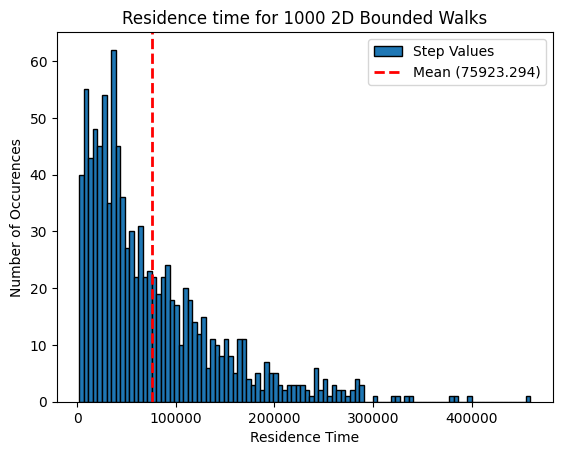

In [ ]:
plt.figure()
#plotting histogram
plt.hist(stepsArray, edgecolor = 'black', bins = 100, label = 'Step Values')
plt.legend()
#plotting mean vertical line
plt.axvline(mean, color='r', linestyle='--', linewidth=2, label = f'Mean ({mean})')
plt.legend()
plt.title("Residence time for 1000 2D Bounded Walks")
plt.xlabel("Residence Time")
plt.ylabel("Number of Occurences")
plt.show()

The distribution is a right-skewed distribution. This makes sense since more values should populate to the left of the mean. This is because the values can get really high but they can't get less than 0, so for the small times to make up for the really high times, the peaks must be pushed to the left of the mean. 